# House predictions with linear regression

In [20]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [21]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /home/akbar/SML/Lab1/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.029028 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/akbar/SML/Lab1/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.011941 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

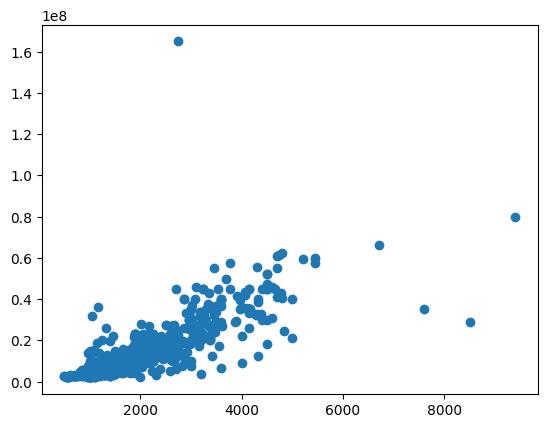

In [22]:
plt.scatter(data['Area'], data['Price'])

In [23]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002229     | 144542935.387653   | 27252286.138422      | 4929368.901326                  | 4401436.315172                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [24]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6069324.979163194,243656.3231349956
Area,None,9645.959851458418,134.75985140632312


In [25]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9645.959851458418
y-intercept: -6069324.979163194


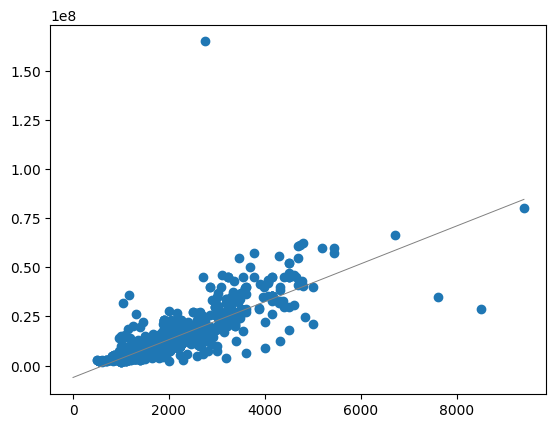

In [26]:
plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [27]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 272

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.030270     | 140488642.070995   | 18971248.430487      | 4257494.370276                  | 3840737.321531                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [28]:
model.coefficients

name,index,value,stderr
(intercept),None,-3164192.0826684255,606325.4230781195
Area,None,8844.16968975603,261.32391341157125
Location,Manikonda,-11752.860242206107,662517.5903965053
Location,Alwal,-812672.7649277743,1213539.715392494
Location,Kukatpally,1707145.6441670917,648867.964652062
Location,Gachibowli,4664571.872587687,751207.9537387538
Location,Tellapur,-993893.9040807199,1070648.518027685
Location,Kokapet,762823.218673975,802469.0824076438
Location,Hyder Nagar,1731493.8232198649,2074901.2675177408
Location,Mehdipatnam,257721.043411896,1586684.2472485239


In [29]:
model.evaluate(data)

{'max_error': 140488642.0709952, 'rmse': 4237614.248746588}

In [39]:
house = tc.SFrame({'Area': [1000, 2000], 'No. of Bedrooms':[3, 5]})
house

Area,No. of Bedrooms
1000,3
2000,5


In [43]:
model.predict(house)

dtype: float
Rows: 2
[2292046.772597243, 8580453.338367924]

In [44]:
simple_model.predict(house)

dtype: float
Rows: 2
[3576634.872295223, 13222594.72375364]

In [ ]:
Akbar Abdurakhmonov( Group 2)

### Step 1:

In [53]:
house_1 = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
predicted = model.predict(house_1)
house_1['Predicted price'] = predicted
house_1


Area,No. of Bedrooms,Predicted price
1000,3,2292046.772597243


### Step 2:

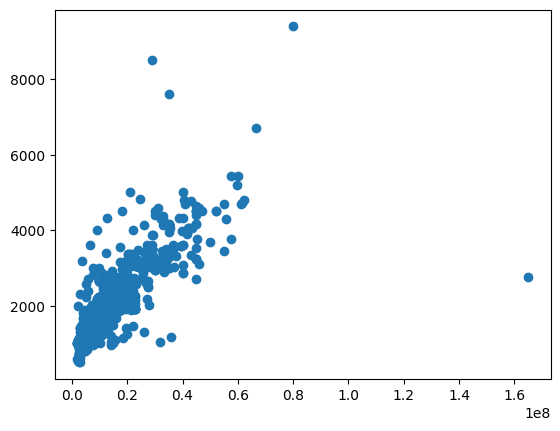

In [63]:
plt.scatter(data['Price'], data['Area'])

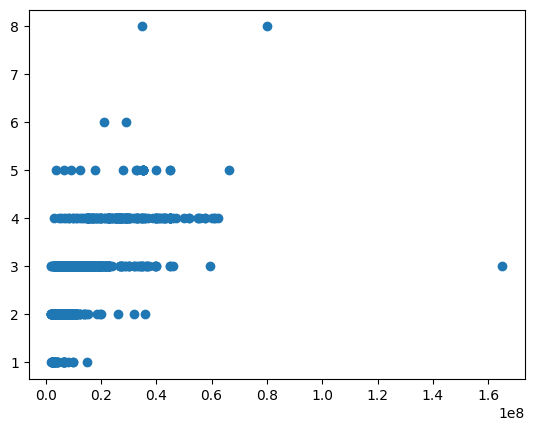

In [62]:
plt.scatter(data['Price'], data['No. of Bedrooms'])

### Step 3:

In [65]:
two_feature_model = tc.linear_regression.create(data, target='Price',  features=['Area', 'No. of Bedrooms'],)

two_feature_model.coefficients

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.002644     | 143654471.930270   | 20497682.650037      | 4929823.306115                  | 3355350.614382                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

name,index,value,stderr
(intercept),None,-4265547.249080051,419860.8249482127
Area,None,10917.84147700592,220.47023846296025
No. of Bedrooms,None,-1470996.2476520478,239300.60561034377


### Step 4:

More important feature will the feature with higher absolute value of the coefficient. In this case the 'Area' is more important than 'No. of Bedrooms', as 'Area' has larger absolute values.  

### Step 5:

In [71]:
two_feature_model.evaluate(data)

{'max_error': 143654471.9302699, 'rmse': 4863167.770512018}

**Model output:** <br>
{'max_error': 140488642.0709952, 'rmse': 4237614.248746588}

**Two_feature_model output:**<br>
{'max_error': 143654471.9302699, 'rmse': 4863167.770512018}

### Step 6:

In [78]:
house_new = tc.SFrame({ 'Area': [4000, 2500, 1500, 1000],'No. of Bedrooms': [4, 5, 3, 2]})
house_new

predicted_new = two_feature_model.predict(house_new)
house_new['Predicted price'] = predicted_new
house_new

Area,No. of Bedrooms,Predicted price
4000,4,33521833.66833544
2500,5,15674075.205174513
1500,3,7698226.223472688
1000,2,3710301.732621775


### Step 7:

'RMSE' is a measurement of precision for the predictions. It calculates precision by dividing the number of correct positive predictions by the total number of instances the model predicted. 